In [147]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [148]:
data = pd.read_csv("Gandum.csv")
data.columns = ["id", "Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"]

# Descriptive Statistics
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis.

In [149]:
def createData(colname):
    attr = data[colname]
    desc = attr.describe()
    newData = [desc[1], desc[5], attr.mode()[0], desc[2], attr.var(), attr.max() - attr.min(), attr.min(), attr.max(), desc[4], desc[5], desc[6], desc[6] - desc[4], attr.skew(), attr.kurtosis()]
    return newData

In [243]:
descstats = []
for i in range (data.columns.size):
    if i in [0,1]:
        continue
    else:
        newdata = createData(data.columns[i])
        descstats.append(newdata)

In [244]:
descstats = pd.DataFrame(data=descstats, index=['SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum', 'Kelas'], columns=['Mean', 'Median', 'Modus', 'STD', 'Variansi', 'Range', 'Min', 'Max', '25%', '50%', '75%', 'IQR', 'Skewness', 'Kurtosis']).transpose()
descstats

,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
Mean,116.020635,53.705716,0.878741,4.935010e+03,77.755080,0.648320,281.409028,0.761813,2.150829,1.503006
Median,115.396744,53.727453,0.889996,4.855000e+03,77.628878,0.625731,279.955000,0.761403,2.193132,2.000000
Modus,74.133114,39.906517,0.719916,3.802000e+03,71.293564,0.735849,197.015000,0.174590,1.440796,2.000000
STD,18.292730,4.069573,0.036619,1.011684e+03,8.056920,0.094455,37.339355,0.061741,0.250010,0.500493
Variansi,334.623982,16.561426,0.001341,1.023504e+06,64.913953,0.008922,1394.227447,0.003812,0.062505,0.250493
Range,153.795469,29.071182,0.194085,5.141000e+03,40.747172,0.468972,291.822000,0.730158,1.024013,1.000000
Min,74.133114,39.906517,0.719916,2.579000e+03,56.666658,0.409927,197.015000,0.174590,1.440796,1.000000
Max,227.928583,68.977700,0.914001,7.720000e+03,97.413830,0.878899,488.837000,0.904748,2.464809,2.000000
25%,104.063393,51.192400,0.863673,4.166500e+03,71.743089,0.572602,255.854000,0.732088,1.983917,1.000000
50%,115.396744,53.727453,0.889996,4.855000e+03,77.628878,0.625731,279.955000,0.761403,2.193132,2.000000


# Distribution Plots
Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik.

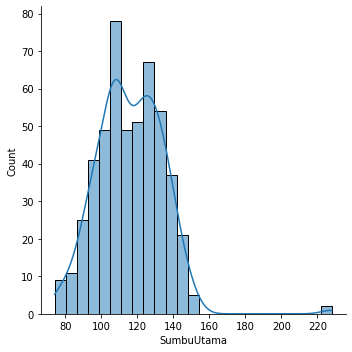

In [245]:
sns.displot(data['SumbuUtama'], kde=True)

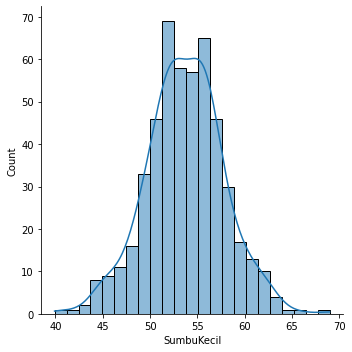

In [246]:
sns.displot(data['SumbuKecil'], kde=True)

# Normality Test
Menentukan setiap kolom numerik berdistribusi normal atau tidak. 

Null hypothesis dipenuhi ketika p-value lebih besar dari alpha, dan ditolak jika p-value lebih kecil sama dengan alpha, 0.05. Ketika null hypothesis terpenuhi, maka sample data diambil dari populasi yang memenuhi Gaussian Normal Distribution.

In [247]:
alpha = 0.05

In [248]:
def normalityTest(colname): 
    global alpha 
    k, p = stats.normaltest(data[colname])
    if p > alpha:
        return True, p
    else:
        return False, p

In [249]:
resnormaltest = []
for i in range (data.columns.size):
    if i in [0,1]:
        continue
    else:
        isnormal, p = normalityTest(data.columns[i])
        resnormaltest.append((isnormal,p))

In [250]:
resnormaltest = pd.DataFrame(data=resnormaltest, index=['SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum', 'Kelas'], columns=['IsNormal based on p-value', 'p-value'])

resnormaltest

,IsNormal based on p-value,p-value
SumbuUtama,False,2.033381e-21
SumbuKecil,True,1.504938e-01
Keunikan,False,5.235534e-35
AreaBulatan,False,4.689965e-03
Diameter,False,2.600459e-02
KadarAir,False,2.145149e-11
Keliling,False,1.747816e-15
Bulatan,False,1.304302e-96
Ransum,False,8.913828e-09
Kelas,False,0.000000e+00


### Checking for Normality on SumbuUtama
Berdasarkan normality test, nilai p untuk kolom SumbuUtama adalah p = 2.033381e-21 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, sehingga kolom SumbuUtama <b>tidak terdistribusi normal</b>. 

### Checking for Normality on SumbuKecil
Berdasarkan normality test, nilai p untuk kolom SumbuUtama adalah p = 1.504938e-01 > 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya memenuhi kaidah distribusi normal, sehingga kolom SumbuKecil <b> terdistribusi normal</b>. 

### Checking for Normality on Keunikan
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 5.235534e-35 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya memenuhi kaidah distribusi normal, sehingga kolom Keunikan <b>tidak terdistribusi normal</b>. 

### Checking for Normality on AreaBulatan
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 4.689965e-03 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya memenuhi kaidah distribusi normal, sehingga kolom AreaBulatan <b>tidak terdistribusi normal</b>

### Checking for Normality on Diameter
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 2.600459e-02 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, sehingga kolom Diameter <b>tidak terdistribusi normal</b>

### Checking for Normality on KadarAir
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 2.145149e-11 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, sehingga kolom KadarAir <b>tidak terdistribusi normal</b>

### Checking for Normality on Keliling
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 1.747816e-15 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, sehingga kolom Keliling <b>tidak terdistribusi normal</b>

### Checking for Normality on Bulatan
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 1.304302e-96 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, sehingga kolom Bulatan <b>tidak terdistribusi normal</b>

### Checking for Normality on Ransum
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 8.913828e-09 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, sehingga kolom Ransum <b>tidak terdistribusi normal</b>

### Checking for Normality on Kelas
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 0 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, sehingga kolom Kelas <b>tidak terdistribusi normal</b>